In [1]:
import torch 

import torchvision  # 🖼️ Torchvision: libreria complementare a PyTorch, specifica per la visione artificiale 
                    #                 (image datasets, modelli pre-addestrati, trasformazioni)

import torchvision.transforms as transforms  # ✍️ Transforms: modulo di torchvision per applicare trasformazioni alle immagini 
                                             #                (es. normalizzazione, rotazione, trasformazione in tensori, ecc.)

from torch.utils.data import DataLoader  # 🚚 DataLoader: strumento per gestire il caricamento dei dati, divide il 
                                         #                 dataset in batch e gestisce lo shuffling (mescolamento)

from torchvision.datasets import MNIST  # 🔢 MNIST: dataset di cifre scritte a mano, fornito direttamente 
                                        #            da torchvision (scaricabile automaticamente)

### Caricamento del Dataset MNIST

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Con ToTensor() convertiamo le immagini PIL o NumPy array in tensori PyTorch
    transforms.Normalize((0.5,), (0.5,))  # Normalizziamo i valori dei pixel in modo che siano compresi tra -1 e 1
])

trainset = MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testset = MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

print(f"Dimensione del dataset di training: {len(trainset)} campioni")
print(f"Numero di batch nel training set: {len(trainloader)}")
print(f"Dimensione del dataset di test: {len(testset)} campioni")
print(f"Numero di batch nel test set: {len(testloader)}")

Dimensione del dataset di training: 60000 campioni
Numero di batch nel training set: 938
Dimensione del dataset di test: 10000 campioni
Numero di batch nel test set: 157


In [3]:
# Ogni immagine è composta da 28x28 pixel. 
# Prendiamo la prima immagine del dataset per osservarle la forma
image, label = trainset[0]
print(f"Forma dell'immagine: {image.shape}")  # torch.Size([1, 28, 28])

Forma dell'immagine: torch.Size([1, 28, 28])


### Definizione della Rete Neurale

In [4]:
import torch.nn as nn

# Definizione della Rete Neurale
class ReteNeuraleSemplice(nn.Module):
    def __init__(self):
        super(ReteNeuraleSemplice, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Primo layer completamente connesso
        self.fc2 = nn.Linear(128, 64)  # Secondo layer completamente connesso
        self.fc3 = nn.Linear(64, 10)  # Layer di output (10 classi per le cifre 0-9)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # l'immagine 28x28 è appiattita a un vettore
        x = torch.relu(self.fc1(x))  # Funzione di attivazione ReLU
        x = torch.relu(self.fc2(x))  # Funzione di attivazione ReLU
        x = self.fc3(x)  # Output finale senza attivazione (per cross-entropy loss)
        return x

### Inizializzazione del modello, funzione di perdita e ottimizzatore

$$
L = - \sum_{i=1}^{N} y_i \log(p_i)
$$

In [5]:
model = ReteNeuraleSemplice()

criterion = nn.CrossEntropyLoss()

import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent (SGD)

### Ciclo di Addestramento

In [6]:
epochs = 5  
total_steps = len(trainloader)

for epoch in range(epochs):
    for i, (inputs, labels) in enumerate(trainloader):
        # Passaggio Forward
        outputs = model(inputs)  # Predizioni del modello
        loss = criterion(outputs, labels)  # Calcolo della perdita
        
        # Backpropagation e aggiornamento dei pesi
        optimizer.zero_grad()  # Azzeramento dei gradienti
        loss.backward()  # Backpropagation
        optimizer.step()  # Aggiornamento dei pesi
        
        # Stampa ogni 100 batch
        if (i + 1) % 100 == 0:
            print(f'Epoca [{epoch+1}/{epochs}], Passo [{i+1}/{total_steps}], Perdita: {loss.item():.4f}')

print('Addestramento completato!')

Epoca [1/5], Passo [100/938], Perdita: 2.0879
Epoca [1/5], Passo [200/938], Perdita: 1.7061
Epoca [1/5], Passo [300/938], Perdita: 1.1309
Epoca [1/5], Passo [400/938], Perdita: 0.8041
Epoca [1/5], Passo [500/938], Perdita: 0.8516
Epoca [1/5], Passo [600/938], Perdita: 0.5698
Epoca [1/5], Passo [700/938], Perdita: 0.5434
Epoca [1/5], Passo [800/938], Perdita: 0.5949
Epoca [1/5], Passo [900/938], Perdita: 0.5772
Epoca [2/5], Passo [100/938], Perdita: 0.2867
Epoca [2/5], Passo [200/938], Perdita: 0.2905
Epoca [2/5], Passo [300/938], Perdita: 0.6458
Epoca [2/5], Passo [400/938], Perdita: 0.3271
Epoca [2/5], Passo [500/938], Perdita: 0.4601
Epoca [2/5], Passo [600/938], Perdita: 0.5303
Epoca [2/5], Passo [700/938], Perdita: 0.3227
Epoca [2/5], Passo [800/938], Perdita: 0.3905
Epoca [2/5], Passo [900/938], Perdita: 0.2788
Epoca [3/5], Passo [100/938], Perdita: 0.3376
Epoca [3/5], Passo [200/938], Perdita: 0.3524
Epoca [3/5], Passo [300/938], Perdita: 0.3423
Epoca [3/5], Passo [400/938], Perd

### Valutazione del modello sul test set

In [8]:
correct = 0
total = 0

# Disattivazione del calcolo del gradiente
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)  # Predizioni del modello
        _, predicted = torch.max(outputs, 1)  # Seleziona la classe con la probabilità più alta
        total += labels.size(0)  # Conta il numero totale di etichette
        correct += (predicted == labels).sum().item()  # Confronta le predizioni con le etichette vere

accuracy = 100 * correct / total
print(f'Accuratezza sul set di test: {accuracy:.2f}%')

Accuratezza sul set di test: 92.32%


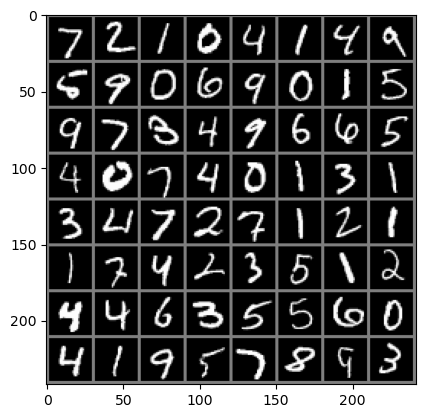

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione di visualizzazione delle immagini
def imshow(img):
    img = img / 2 + 0.5  # De-normalizzazione dell'immagine
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Cambiamo l'ordine delle dimensioni (C, H, W) -> (H, W, C)
    plt.show()

# Ottieniamo un batch di dati dal dataloader
dataiter = iter(testloader)
images, labels = next(dataiter)

# Esempio di immagini
imshow(torchvision.utils.make_grid(images))

In [10]:
outputs = model(images)  # Calcoliamo le cifre predette
_, predicted = torch.max(outputs, 1)

print('Predizioni: ', ' '.join(f'{predicted[j].item()}' for j in range(8)))
print('Etichette reali: ', ' '.join(f'{labels[j].item()}' for j in range(8)))

Predizioni:  7 2 1 0 4 1 4 9
Etichette reali:  7 2 1 0 4 1 4 9
